# Redes Neuronales

En este notebook vamos a construir la unidad básica de las redes neuronales, el Perceptrón. Tiene dos partes:
1. **Perceptrón 2D**: vamos a entrenar un Perceptrón con Keras sobre un dataset ficticio. Exploramos cómo son las fronteras en 2D. Limitaciones del Perceptrón. Generamos un dataset no-linealmente separable y vemos cómo responde el Perceptrón.
2. **MNIST**: vamos a trabajar con este conocido dataset. El objetivo es identificar dígitos, del 0 al 9, escritos a manos. Primero entrenaremos una red neuronal de una capa y luego una Red Neuronal de más capas.

## 1. Perceptrón en 2D

Vamos a generar un dataset sintético con unas funciones que ya vienen incorporadas en scikit-learn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [3]:
from sklearn.datasets.samples_generator import make_blobs, make_moons
#X, y = make_blobs(n_samples=1000, centers=2, n_features=2,random_state=0)

X, y = make_moons(n_samples=1000, random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


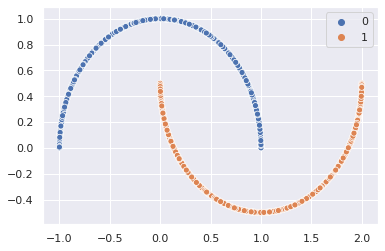

In [5]:
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
plt.show()

Reescalamos los datos

In [0]:
X[:,0] = (X[:,0] - X[:,0].mean())/X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()

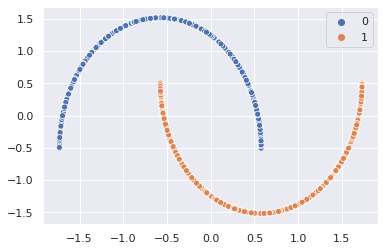

In [7]:
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
plt.show()

Definimos el modelo a entrenar y volvemos a mirar algunas de sus características.

In [0]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
#optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.0, beta_2=0.0, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
history = model.fit(X, y, epochs=700, validation_split=0.25)

Train on 750 samples, validate on 250 samples
Epoch 1/700
750/750 [==============================] - 0s 647us/step - loss: 0.6585 - acc: 0.6227 - val_loss: 0.6118 - val_acc: 0.6920
Epoch 2/700
750/750 [==============================] - 0s 50us/step - loss: 0.5976 - acc: 0.7200 - val_loss: 0.5571 - val_acc: 0.7720
Epoch 3/700
750/750 [==============================] - 0s 51us/step - loss: 0.5465 - acc: 0.7627 - val_loss: 0.5125 - val_acc: 0.8000
Epoch 4/700
750/750 [==============================] - 0s 60us/step - loss: 0.5041 - acc: 0.7787 - val_loss: 0.4751 - val_acc: 0.8000
Epoch 5/700
750/750 [==============================] - 0s 58us/step - loss: 0.4688 - acc: 0.7907 - val_loss: 0.4433 - val_acc: 0.8200
Epoch 6/700
750/750 [==============================] - 0s 55us/step - loss: 0.4392 - acc: 0.8133 - val_loss: 0.4165 - val_acc: 0.8280
Epoch 7/700
750/750 [==============================] - 0s 51us/step - loss: 0.4144 - acc: 0.8360 - val_loss: 0.3939 - val_acc: 0.8480
Epoch 8/700
750

In [43]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [44]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


Notar que se agregaron una keys, asociadas al set de validación. Grafiquemos.

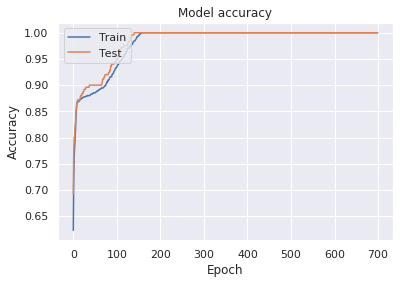

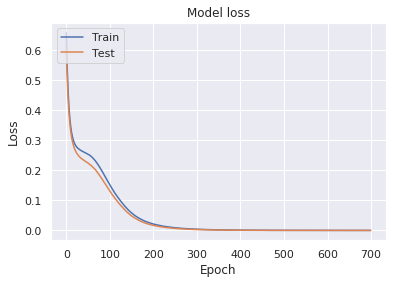

In [45]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

¿Cuántos parámetros tiene ahora el modelo?

In [38]:
print(model.get_weights())

[array([[-0.03158568, -0.49869993],
       [-0.31691888,  1.4118339 ]], dtype=float32), array([-0.46641147,  1.7869096 ], dtype=float32), array([[-1.0529466],
       [-2.0340865]], dtype=float32), array([3.6286607], dtype=float32)]


Y graficamos las fronteras de decisión. ¿Notan que ya no es una frontera abrupta, sino que hay una zona de cambio?¿A qué se debe?

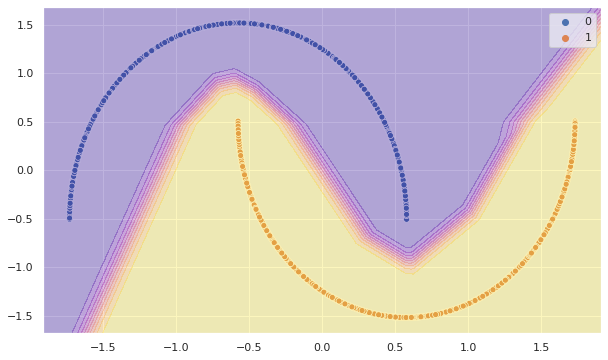

In [46]:
plt.figure(figsize = (10,6))

ax = sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
contours = ax.contourf(xx, yy, Z, levels = 10, alpha=0.3, cmap = 'plasma')
plt.show()

**Ejercicio:** volver a correr esta sección, pero reemplazando la función que genera los datos `make_blobs` por `make_moons`. ¿Qué problema ven en el resultado?

**Ejercicio**: con los datos producidos por `make_moons`, agregar una capa a la red neuronal, con 10 neuronas y función de activación `relu`.

## 2. MNIST

El dataset de MNIST es un dataset muy conocido. Consiste en dígitos escritos a mano. Muchas modelos de redes neuronales son probados primeros en este set. Pueden encontrar una descripción más detallada, y un ranking de modelos con su desempeño, en el siguiente link.

https://en.wikipedia.org/wiki/MNIST_database

Vamos a arrancar con una sola capa, con una activación `softmax`, ya que se trata de diez clases.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import os #esta libreria permite trabajar con funciones del sistema operativo 
import random

from sklearn.model_selection import train_test_split

**1. Carga de datos**

Cada instancia del dataset es una imagen guardada en una carpeta con la etiqueta correspondiente.

In [0]:
directorio = 'Datasets/MNIST/'

Miramos las carpetas que hay adentro de la carpeta MNIST

In [0]:
print(os.listdir(directorio))

['8', '6', '7', '9', '4', '2', '3', '5', '1', '0']


Creamos los contenedores vacíos

In [0]:
todas_imagenes = []
y_todas_imagenes = []

y los llenamos.

In [0]:
digitos = np.arange(0,10)
for digito in digitos:
    directorio = 'Datasets/MNIST/' + str(digito) + '/'
    print(digito, directorio)
    print('Hay', len(os.listdir(directorio)),'imagenes')
    for imagen in os.listdir(directorio):
        todas_imagenes.append(plt.imread(directorio + imagen,format='jpg'))
        y_todas_imagenes.append(digito)
        
todas_imagenes = np.array(todas_imagenes)
y_todas_imagenes = np.array(y_todas_imagenes)

0 Datasets/MNIST/0/
Hay 4132 imagenes
1 Datasets/MNIST/1/
Hay 4684 imagenes
2 Datasets/MNIST/2/
Hay 4177 imagenes
3 Datasets/MNIST/3/
Hay 4351 imagenes
4 Datasets/MNIST/4/
Hay 4072 imagenes
5 Datasets/MNIST/5/
Hay 3795 imagenes
6 Datasets/MNIST/6/
Hay 4137 imagenes
7 Datasets/MNIST/7/
Hay 4401 imagenes
8 Datasets/MNIST/8/
Hay 4063 imagenes
9 Datasets/MNIST/9/
Hay 4188 imagenes


**2. Preprocesado**

**Ejercicio:** Mirar el `shape` de `X` y responder: ¿Cuántas instancias son?¿Qué ancho y largo tienen las imágenes?¿Cuántas bandas?

In [0]:
print(todas_imagenes.shape, y_todas_imagenes.shape)
n_instancias = todas_imagenes.shape[0]
ancho_imagen = todas_imagenes.shape[1]
largo_imagen = todas_imagenes.shape[2]

(42000, 28, 28) (42000,)


Miramos una imagen al azar.

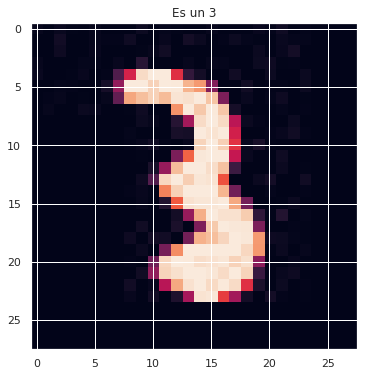

In [0]:
idx_imagen = np.random.randint(0,todas_imagenes.shape[0])
plt.figure(figsize = (6,6))
plt.title('Es un ' + str(y_todas_imagenes[idx_imagen]))
plt.imshow(todas_imagenes[idx_imagen, :, :])
plt.show()

**Ejercicio:** Crear un arreglo `X` que sea igual a `todas_imagenes`, pero de forma `(n_instancias, largo_imagen * ancho_imagen)`.

In [0]:
X = todas_imagenes.reshape(n_instancias, largo_imagen*ancho_imagen)
print(X.shape)

(42000, 784)


**Ejercicio:** Reescalar las imágenes entre 0 y 1.

In [0]:
X = X/255

**Ejercicio:** usar el `to_categorical` de Keras para llevar `y_todas_imagenes` a una columna con unos y ceros para cada clase `y` (One Hot Encoding).

In [0]:
from keras.utils import to_categorical
y =to_categorical(y_todas_imagenes)
print(y.shape)

(42000, 10)


**Ejercicio:** hacer un `train_test_split`. Usar el 20% del dataset como conjunto de test.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

**3. Entrenamiento del modelo**

Comenzar entrenando un Red Neuronal de una capa, con diez neuronas, función de activación `softmax` y pérdida `categorical_crossentropy`. Usar como optimizador `Adam` y `epoch = 20`.

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras

model = Sequential()
#     model.add(Dense(16, activation='relu'))
#     model.add(Dense(8, activation='relu'))
# model.add(Dense(800, activation='relu'))
model.add(Dense(10, activation='softmax'))

optimizador = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(optimizer=optimizador,loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)


Train on 30240 samples, validate on 3360 samples
Epoch 1/10
30240/30240 [==============================] - 3s 108us/step - loss: 0.5843 - acc: 0.8520 - val_loss: 0.3563 - val_acc: 0.9057
Epoch 2/10
30240/30240 [==============================] - 3s 110us/step - loss: 0.3304 - acc: 0.9085 - val_loss: 0.3063 - val_acc: 0.9137
Epoch 3/10
30240/30240 [==============================] - 3s 95us/step - loss: 0.2939 - acc: 0.9173 - val_loss: 0.2949 - val_acc: 0.9152
Epoch 4/10
30240/30240 [==============================] - 3s 106us/step - loss: 0.2761 - acc: 0.9234 - val_loss: 0.2728 - val_acc: 0.9259
Epoch 5/10
30240/30240 [==============================] - 3s 97us/step - loss: 0.2644 - acc: 0.9256 - val_loss: 0.2752 - val_acc: 0.9185
Epoch 6/10
30240/30240 [==============================] - 3s 90us/step - loss: 0.2557 - acc: 0.9286 - val_loss: 0.2626 - val_acc: 0.9262
Epoch 7/10
30240/30240 [==============================] - 3s 108us/step - loss: 0.2489 - acc: 0.9294 - val_loss: 0.2587 - val_

**Ejercicio:** ¿cuántos parámetros tiene el modelo? Recordar que hay una función de Keras que hace un *informe* de la red neuronal.

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


**Ejercicio:** Graficar la pérdida y la exactitud en función de *epochs* para validación y entrenamiento.

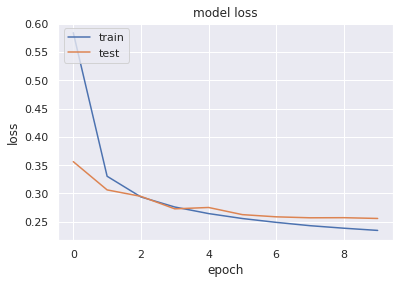

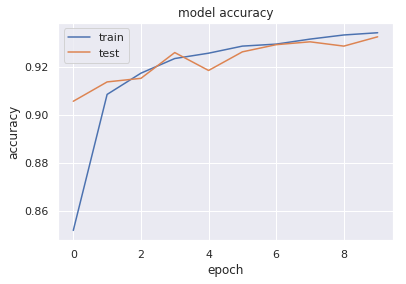

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.legend(['train', 'test'], loc='upper left')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**4. Evaluación de los resultados.**

**Ejercicio**: predecir las etiquetas de todo el set de testeo.

In [0]:
y_test_pred = model.predict(X_test)

Esto sirve para pasar de probabilidades a la etiqueta en sí. En este caso, la etiqueta es el dígito, y corresponde al número de columna.

In [0]:
y_test_pred = np.argmax(y_test_pred, axis = 1)
y_test_pred.shape

(8400,)

**Ejercicio:** Calcular exactitud y la matriz de confusión para el conjunto de entrenamiento.

In [0]:
from sklearn.metrics import confusion_matrix

y_test = np.argmax(y_test,axis = 1)

confusion_matrix(y_test, y_test_pred)

array([[799,   0,   0,   0,   0,  12,   8,   2,   6,   0],
       [  0, 911,   8,   4,   0,   2,   2,   2,   6,   2],
       [  7,   8, 747,  11,  11,   5,  11,   7,  22,   6],
       [  4,   4,  22, 765,   1,  40,   3,   4,  23,   4],
       [  1,   5,   6,   0, 754,   1,  11,   1,   8,  27],
       [ 13,   2,   6,  17,   6, 660,  18,   5,  26,   6],
       [  2,   0,   5,   0,   5,   5, 807,   0,   3,   0],
       [  1,   7,  14,   1,   8,   3,   1, 797,   3,  45],
       [  6,  16,   3,  19,   3,  20,   7,   3, 727,   9],
       [  4,   3,   0,  14,  18,   3,   1,  14,  10, 771]])

In [0]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.9211904761904762

**Ejercicio:** ¿Dónde se está confundiendo? Graficar algunos ejemplos.

In [0]:
errores = y_test != y_test_pred

In [0]:
imagenes_errores = X_test[errores,:]
y_test_errores = y_test[errores]
y_test_pred_errores = y_test_pred[errores]
print(imagenes_errores.shape)

(662, 784)


In [0]:
imagenes_errores = imagenes_errores.reshape(imagenes_errores.shape[0], ancho_imagen, largo_imagen)
print(imagenes_errores.shape)

(662, 28, 28)


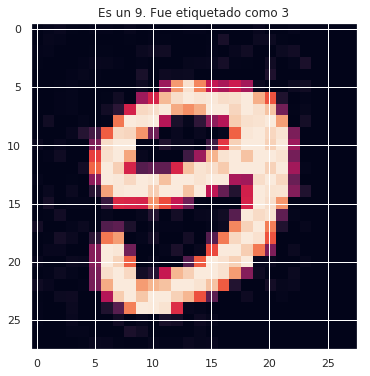

In [0]:
idx_imagen = np.random.randint(0,imagenes_errores.shape[0])
plt.figure(figsize = (6,6))
plt.title('Es un ' + str(y_test_errores[idx_imagen]) +'. Fue etiquetado como ' + str(y_test_pred_errores[idx_imagen]))
plt.imshow(imagenes_errores[idx_imagen, :, :])
plt.show()

**Ejercicio:** Volver a entrenar, pero agregando una capa con 800 neuronas y función de activación `relu`.

**Extra:** En el caso del Perceptrón de una sola capa (10 neuronas de salida y nada más), ¿qué está viendo la red?

Notar que los parámetros para cualquiera de las neuronas de salida son 784 + Bias. Como hay 10 neuronas, son 7850 parámetros. Keras, con las función `model.get_weights()`, devuelve todos los pesos y *biases* de cada neurona. Seleccionado la primera componente, descartamos los *biases*.

In [0]:
ws = model.get_weights()[0]
print(ws.shape)

(784, 10)


Notar que son 784: un peso por cada pixel de la imagen - sin el bias - por diez neuronas.

Como son 784, podemos llevarlos a la forma `(28,28)` y graficarlos como si fueran una imagen. Hacemos eso para todas las neuronas.

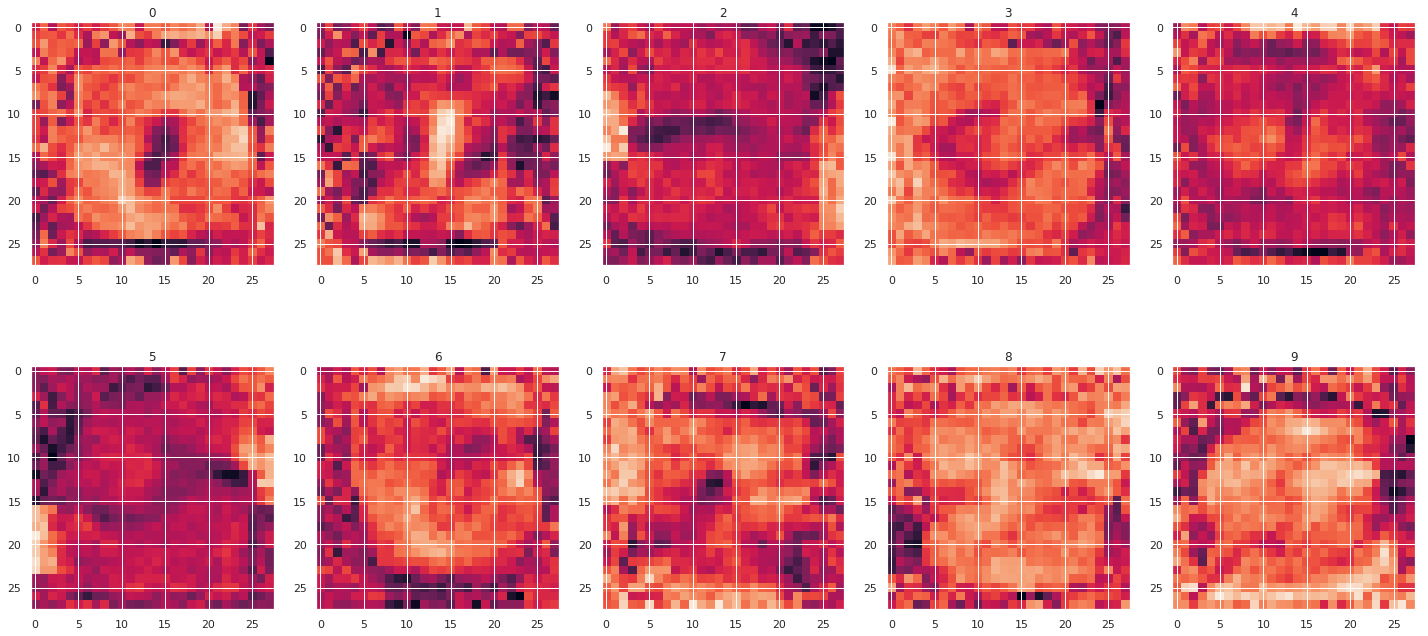

In [0]:
plt.figure(figsize = (20,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    w0 = ws[:,i]
    plt.title(i)
    plt.imshow(w0.reshape(28,28))
plt.tight_layout()
plt.show()